In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/nigeria_houses_data.csv')
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['title']=le.fit_transform(df['title'])
df['state']=le.fit_transform(df['state'])
df['town']=le.fit_transform(df['town'])
df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,2,127,1,450000000.0
1,4.0,5.0,5.0,4.0,6,110,1,800000000.0
2,4.0,5.0,5.0,4.0,2,122,17,120000000.0
3,4.0,4.0,5.0,6.0,2,10,17,40000000.0
4,4.0,4.0,5.0,2.0,4,122,17,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,0,99,1,15000000.0
24322,4.0,5.0,5.0,4.0,0,5,20,25000000.0
24323,4.0,5.0,5.0,4.0,2,122,17,68000000.0
24324,3.0,4.0,4.0,3.0,0,180,17,78000000.0


In [ ]:
x=df.drop(['price'],axis=1)
y=df['price']

In [ ]:
x

,bedrooms,bathrooms,toilets,parking_space,title,town,state
0,6.0,5.0,5.0,4.0,2,127,1
1,4.0,5.0,5.0,4.0,6,110,1
2,4.0,5.0,5.0,4.0,2,122,17
3,4.0,4.0,5.0,6.0,2,10,17
4,4.0,4.0,5.0,2.0,4,122,17
...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,0,99,1
24322,4.0,5.0,5.0,4.0,0,5,20
24323,4.0,5.0,5.0,4.0,2,122,17
24324,3.0,4.0,4.0,3.0,0,180,17


In [ ]:
y

,price
0,450000000.0
1,800000000.0
2,120000000.0
3,40000000.0
4,75000000.0
...,...
24321,15000000.0
24322,25000000.0
24323,68000000.0
24324,78000000.0


In [ ]:
x=StandardScaler().fit_transform(x)
x

array([[ 1.45913346,  0.34321194, -0.14381868, ..., -0.33894701,
         0.5931026 , -2.27619698],
       [-0.29760401,  0.34321194, -0.14381868, ...,  2.09273479,
         0.20836573, -2.27619698],
       [-0.29760401,  0.34321194, -0.14381868, ..., -0.33894701,
         0.4799447 ,  0.37988139],
       ...,
       [-0.29760401,  0.34321194, -0.14381868, ..., -0.33894701,
         0.4799447 ,  0.37988139],
       [-1.17597274, -0.51653203, -0.95932757, ..., -1.55478792,
         1.79257639,  0.37988139],
       [-0.29760401,  0.34321194, -0.14381868, ..., -0.33894701,
         0.4799447 ,  0.37988139]])

In [ ]:
#Apply PCA
pca=PCA(n_components=2)
principal_component=pca.fit_transform(x)
df_pca=pd.DataFrame(data=principal_component,columns=['PC1','PC2'])
df_pca['price']=y

In [ ]:
df_pca

,PC1,PC2,price
0,0.941585,1.245579,450000000.0
1,-0.188277,2.844667,800000000.0
2,0.024730,-0.409939,120000000.0
3,-0.421428,-1.221108,40000000.0
4,-0.847971,0.904054,75000000.0
...,...,...,...
24321,-3.825079,-0.271351,15000000.0
24322,-0.177629,-1.807844,25000000.0
24323,0.024730,-0.409939,68000000.0
24324,-1.359360,-1.081259,78000000.0


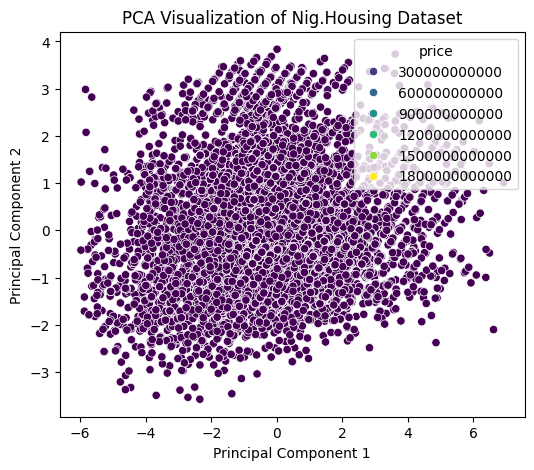

In [ ]:
#Visualize the data
plt.figure(figsize=(6,5))
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='price',palette='viridis')
plt.title('PCA Visualization of Nig.Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='price')
plt.show()

In [ ]:
hs=pd.read_csv('/content/Housing.csv')
hs

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
hs['mainroad']=le.fit_transform(hs['mainroad'])
hs['guestroom']=le.fit_transform(hs['guestroom'])
hs['basement']=le.fit_transform(hs['basement'])
hs['hotwaterheating']=le.fit_transform(hs['hotwaterheating'])
hs['airconditioning']=le.fit_transform(hs['airconditioning'])
hs['prefarea']=le.fit_transform(hs['prefarea'])
hs['furnishingstatus']=le.fit_transform(hs['furnishingstatus'])
hs

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
x=hs.drop(['price'],axis=1)
y=hs['price']

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
y

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
pca=PCA(n_components=2)
principal_component=pca.fit_transform(x)
hs_pca=pd.DataFrame(data=principal_component,columns=['PC1','PC2'])
hs_pca['price']=y

In [ ]:
hs_pca

,PC1,PC2,price
0,2269.459114,1.976528,13300000
1,3809.459303,3.205048,12250000
2,4809.458885,0.013216,12250000
3,2349.459229,1.401055,12215000
4,2269.459025,0.973540,11410000
...,...,...,...
540,-2150.541225,-0.950212,1820000
541,-2750.541439,-0.537561,1767150
542,-1530.541527,-1.394976,1750000
543,-2240.541388,-0.363285,1750000


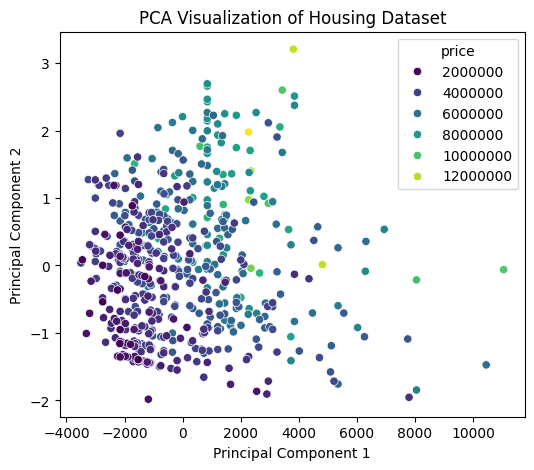

In [ ]:
#To visualize
plt.figure(figsize=(6,5))
sns.scatterplot(data=hs_pca,x='PC1',y='PC2',hue='price',palette='viridis')
plt.title('PCA Visualization of Housing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='price')
plt.show()